In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_method_scores(
    scores, 
    colors, 
    metric_label="Correlation", 
    savepath=None, 
    dpi=500,
    figsize=(3.0, 3.0)
    ):
    """
    scores: dict, e.g. corr or mi
    colors: dict mapping method -> color hex
    metric_label: label for the y-axis (e.g. 'Correlation' or 'Mutual information')
    savepath: if not None, path to save the figure
    dpi: resolution for saving
    """
    methods = list(scores.keys())
    values = np.array([scores[m] for m in methods])
    bar_colors = [colors[m] for m in methods]

    plt.style.use("seaborn-v0_8-white")

    fig, ax = plt.subplots(figsize=figsize)  # small but high-res, journal friendly

    # Bars
    bar_width = 0.7
    bars = ax.bar(
        x=np.arange(len(methods)),
        height=values,
        color=bar_colors,
        edgecolor="black",
        linewidth=1.0,
        width=bar_width,
    )

    # Aesthetics: labels and ticks
    ax.set_xticks(np.arange(len(methods)))
    ax.set_xticklabels(methods, rotation=30, ha="right",
                       fontsize=10, fontweight="bold")
    ax.set_ylabel(metric_label, fontsize=11, fontweight="bold")
    ax.set_xlabel("")  # cleaner look

    # Tight y-limits with a little headroom
    ymin = 0
    ymax = max(values) * 1.15 if max(values) > 0 else 1
    ax.set_ylim(ymin, ymax)

    # Remove gridlines
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Clean spines
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["left"].set_linewidth(0.9)
    ax.spines["bottom"].set_linewidth(0.9)

    # Tick params
    ax.tick_params(axis="both", which="both",
                   labelsize=9, width=0.8, length=4)

    # Annotate bars with values (slightly larger, bold)
    for bar, val in zip(bars, values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            val + (ymax * 0.01),
            f"{val:.3f}",
            ha="center",
            va="bottom",
            fontsize=8,
            fontweight="bold",
        )

    fig.tight_layout(pad=0.5)

    if savepath is not None:
        fig.savefig(savepath, dpi=dpi, bbox_inches="tight")
    return fig, ax

In [3]:
corr = {
    'scDisentangle': 0.03757519960904189,
    'CPA': 0.2018260830418268,
    #'PCA': 7.877461504417442e-08,
    'UMAP': 0.1814414897612033
}

mi = {
    'scDisentangle': 0.009750725795024284,
    'CPA': 0.05214824966835837,
    'PCA': 0.06406296599196214,
    'UMAP': 0.6111996019552528
}

colors = {
    'scDisentangle': '#d62728',
    'CPA': '#CC79A7',
    'PCA': '#698396',
    'UMAP': '#00FFFF',
    }

In [4]:
import os
save_path = '/data/scDisentangle figures/Kang/orthogonal_factors/'
os.makedirs(save_path, exist_ok=True)

(<Figure size 300x300 with 1 Axes>, <Axes: ylabel='Mutual information'>)

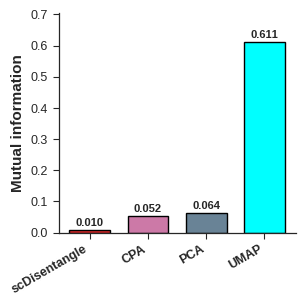

In [5]:
plot_method_scores(mi, colors, metric_label="Mutual information",
                   savepath=f"{save_path}comparison_MI.png", dpi=600)

(<Figure size 300x300 with 1 Axes>, <Axes: ylabel="Pearson's correlation">)

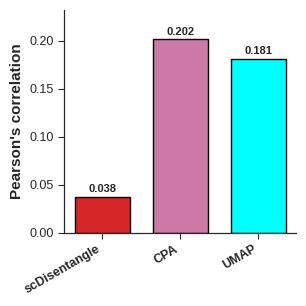

In [6]:
plot_method_scores(corr, colors, metric_label="Pearson's correlation",
                   savepath=f"{save_path}comparison_CORR.png", dpi=600)

# Separate UMAP

(<Figure size 150x300 with 1 Axes>, <Axes: ylabel='Mutual information'>)

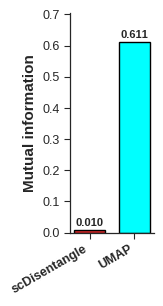

In [7]:
mi = {
    'scDisentangle': 0.009750725795024284,
    'UMAP': 0.6111996019552528
}

plot_method_scores(
    mi, 
    colors, 
    metric_label="Mutual information",
    savepath=f"{save_path}comparison_MI_scdisentangle_versus_umap.png", 
    dpi=600,
    figsize=(1.5, 3.0)
)

(<Figure size 200x300 with 1 Axes>, <Axes: ylabel='Mutual information'>)

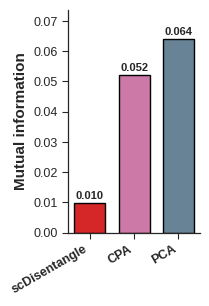

In [8]:
mi = {
    'scDisentangle': 0.009750725795024284,
    'CPA': 0.05214824966835837,
    'PCA': 0.06406296599196214,
}

plot_method_scores(
    mi, 
    colors, 
    metric_label="Mutual information",
    savepath=f"{save_path}comparison_MI_umap_excluded.png", 
    dpi=600,
    figsize=(2, 3.0)
    )